In [ ]:
pip install scikit-learn pandas matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold


# 1. 載入 Red Wine 資料集
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')  # 注意 UCI 使用分號作為分隔符號


In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# 顯示資料的欄位資訊（每個欄位的資料型態、非空值數量、記憶體使用等）
print(df.info())

# 顯示數值欄位的基本統計資訊（平均數、標準差、最大/最小值、四分位數等）
print(df.describe())

# 檢查每個欄位是否有遺漏值（NaN），回傳每個欄位的缺失值數量
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

In [ ]:
# 2. 分離特徵與目標變數
X = df.drop(columns=["quality"])
y = df["quality"]

In [ ]:
# 3. 定義參數範圍
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 3, 5, 10]
}

In [ ]:
# 4. 定義交叉驗證方法（固定亂數確保可重現）
cv = KFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
# 5. GridSearchCV 尋找最佳參數
grid = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 3, 5, 10]},
             scoring='r2')

In [ ]:
# 6. 輸出最佳參數與平均分數
print("最佳參數：", grid.best_params_)
print("最佳平均 R² 分數：", round(grid.best_score_, 3))


最佳參數： {'max_depth': 6, 'min_samples_leaf': 10}
最佳平均 R² 分數： 0.295


In [ ]:
# 7. 用最佳參數重建模型
best_model = DecisionTreeRegressor(
    max_depth=grid.best_params_['max_depth'],
    min_samples_leaf=grid.best_params_['min_samples_leaf'],
    random_state=42
)

In [ ]:
# 8. 交叉驗證（重新驗證每折 R²）
scores = cross_val_score(best_model, X, y, cv=cv, scoring='r2')

print("每折 R² 分數:", np.round(scores, 2).tolist())
print("平均 R² 分數:", round(scores.mean(), 2))
print("R² 分數標準差:", round(scores.std(), 3))

每折 R² 分數: [0.3, 0.26, 0.29, 0.3, 0.32]
平均 R² 分數: 0.3
R² 分數標準差: 0.021


In [ ]:
# 每折 R² 分數：表示模型在該折驗證集上的準確度，分數越高越好（最大為 1）
# 平均 R² 分數：整體模型效能的代表值
# R² 標準差：表示各折間結果的波動程度，數值越小代表模型對資料切分的穩定性越高
# 如果標準差很高（例如 >0.1），代表模型對資料分布變化很敏感，可能需要調整模型參數或特徵工程

In [ ]:
#顯示所有參數組合的分數（可選）
results = pd.DataFrame(grid.cv_results_)
print("\n所有參數組合交叉驗證結果：")
print(results[['params', 'mean_test_score', 'std_test_score']].sort_values(by='mean_test_score', ascending=False))


所有參數組合交叉驗證結果：
                                      params  mean_test_score  std_test_score
19  {'max_depth': 6, 'min_samples_leaf': 10}         0.295099        0.020611
8    {'max_depth': 4, 'min_samples_leaf': 1}         0.292153        0.038474
9    {'max_depth': 4, 'min_samples_leaf': 3}         0.286171        0.044318
18   {'max_depth': 6, 'min_samples_leaf': 5}         0.286134        0.039074
11  {'max_depth': 4, 'min_samples_leaf': 10}         0.284976        0.037059
10   {'max_depth': 4, 'min_samples_leaf': 5}         0.284207        0.045548
12   {'max_depth': 5, 'min_samples_leaf': 1}         0.282034        0.052339
14   {'max_depth': 5, 'min_samples_leaf': 5}         0.280901        0.051535
15  {'max_depth': 5, 'min_samples_leaf': 10}         0.280219        0.025547
13   {'max_depth': 5, 'min_samples_leaf': 3}         0.278442        0.049490
17   {'max_depth': 6, 'min_samples_leaf': 3}         0.277722        0.039137
16   {'max_depth': 6, 'min_samples_leaf': 1}     

--------------------------------------
測試

In [ ]:
# 2.特徵與目標變數分離
X = df.drop(columns=["quality"])
y = df["quality"]

In [ ]:
# 分割資料：80% 訓練、20% 測試
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [3, 5, 10]
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2'
)
grid_search.fit(X_train, y_train)
print("最佳參數：", grid_search.best_params_)

最佳參數： {'max_depth': 4, 'min_samples_leaf': 5}


<ipython-input-55-6f9b636b6b97>:17: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-55-6f9b636b6b97>:17: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-55-6f9b636b6b97>:17: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-55-6f9b636b6b97>:17: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-55-6f9b636b6b97>:17: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-55-6f9b636b6b97>:17: UserWarning: Glyph 21449 (\N{CJK UNIFIED IDEOGRAPH-53C9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-55-6f9b636b6b97>:17: UserWarning: Glyph 39511 (\N{CJK UNIFIED IDEOGRAPH-9A57}) missing from

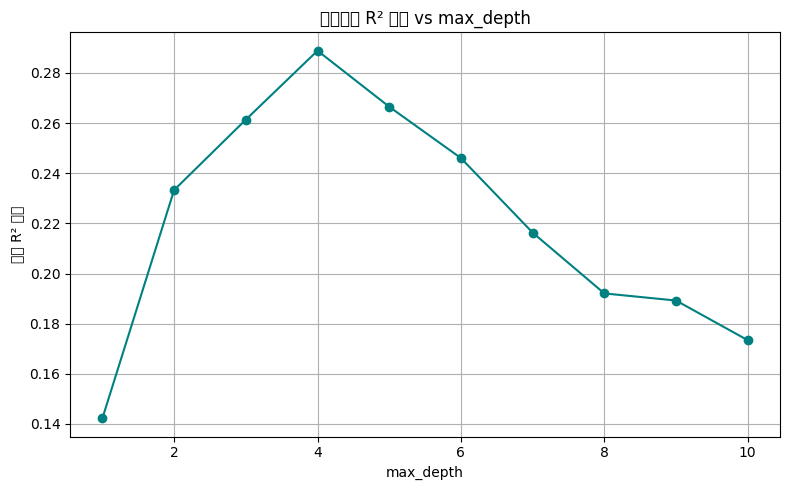

In [ ]:
# 圖表：視覺化 max_depth 對 R² 的影響
import matplotlib.pyplot as plt

depths = range(1, 11)
scores = []

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, min_samples_leaf=5, random_state=42)
    r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    scores.append(r2)

plt.figure(figsize=(8,5))
plt.plot(depths, scores, marker='o', color='teal')
plt.title("交叉驗證 R² 分數 vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("平均 R² 分數")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=42)

In [ ]:
# 使用交叉驗證觀察 R² 分數
cv_scores = cross_val_score(
    best_model, X_train, y_train, cv=5, scoring='r2'
)

In [ ]:
# 顯示結果
print("每折 R² 分數:", np.round(cv_scores, 3).tolist())
print("平均 R² 分數:", round(cv_scores.mean(), 3))
print("R² 分數標準差:", round(cv_scores.std(), 3))


每折 R² 分數: [0.149, 0.289, 0.262, 0.339, 0.406]
平均 R² 分數: 0.289
R² 分數標準差: 0.085
